In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

import time

In [5]:
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list

In [3]:
##This is where I used 186 machine with ELU, ELU, ReLU and Adam to test 18 tests -BUT with new LCPLCP database

out = np.load('Data/true_test_186_100_real_20_clydetookout_L_eluelurelu.pkl', allow_pickle=True)

1, mLCP LinregressResult(slope=1.5114714088370567, intercept=-0.5004724342693716, rvalue=0.7124781473944913, pvalue=0.020768386933840647, stderr=0.5262975430520566)
1, DNP LinregressResult(slope=2.8793239395525534, intercept=-1.1760924201490002, rvalue=0.7968429539853324, pvalue=0.017897962513373573, stderr=0.8912779684590113)
1, All LinregressResult(slope=1.8324218680589033, intercept=-0.636062857782027, rvalue=0.7016491128270158, pvalue=0.0011734435507431654, stderr=0.4652047782705957)
4, mLCP LinregressResult(slope=0.94211899289152, intercept=-0.06729350959373609, rvalue=0.888796964900825, pvalue=0.0005838218288461292, stderr=0.17175491001999543)
4, mLCP LinregressResult(slope=1.3680302612175466, intercept=0.08950596615908968, rvalue=0.5034513629087203, pvalue=0.2034079045143081, stderr=0.9584912371832595)
4, All LinregressResult(slope=0.8283692763051376, intercept=0.11609463458805835, rvalue=0.6213681025107226, pvalue=0.005913226094663303, stderr=0.26113461710371394)
7, mLCP Linreg

Text(0.05, 0.9, 'D')

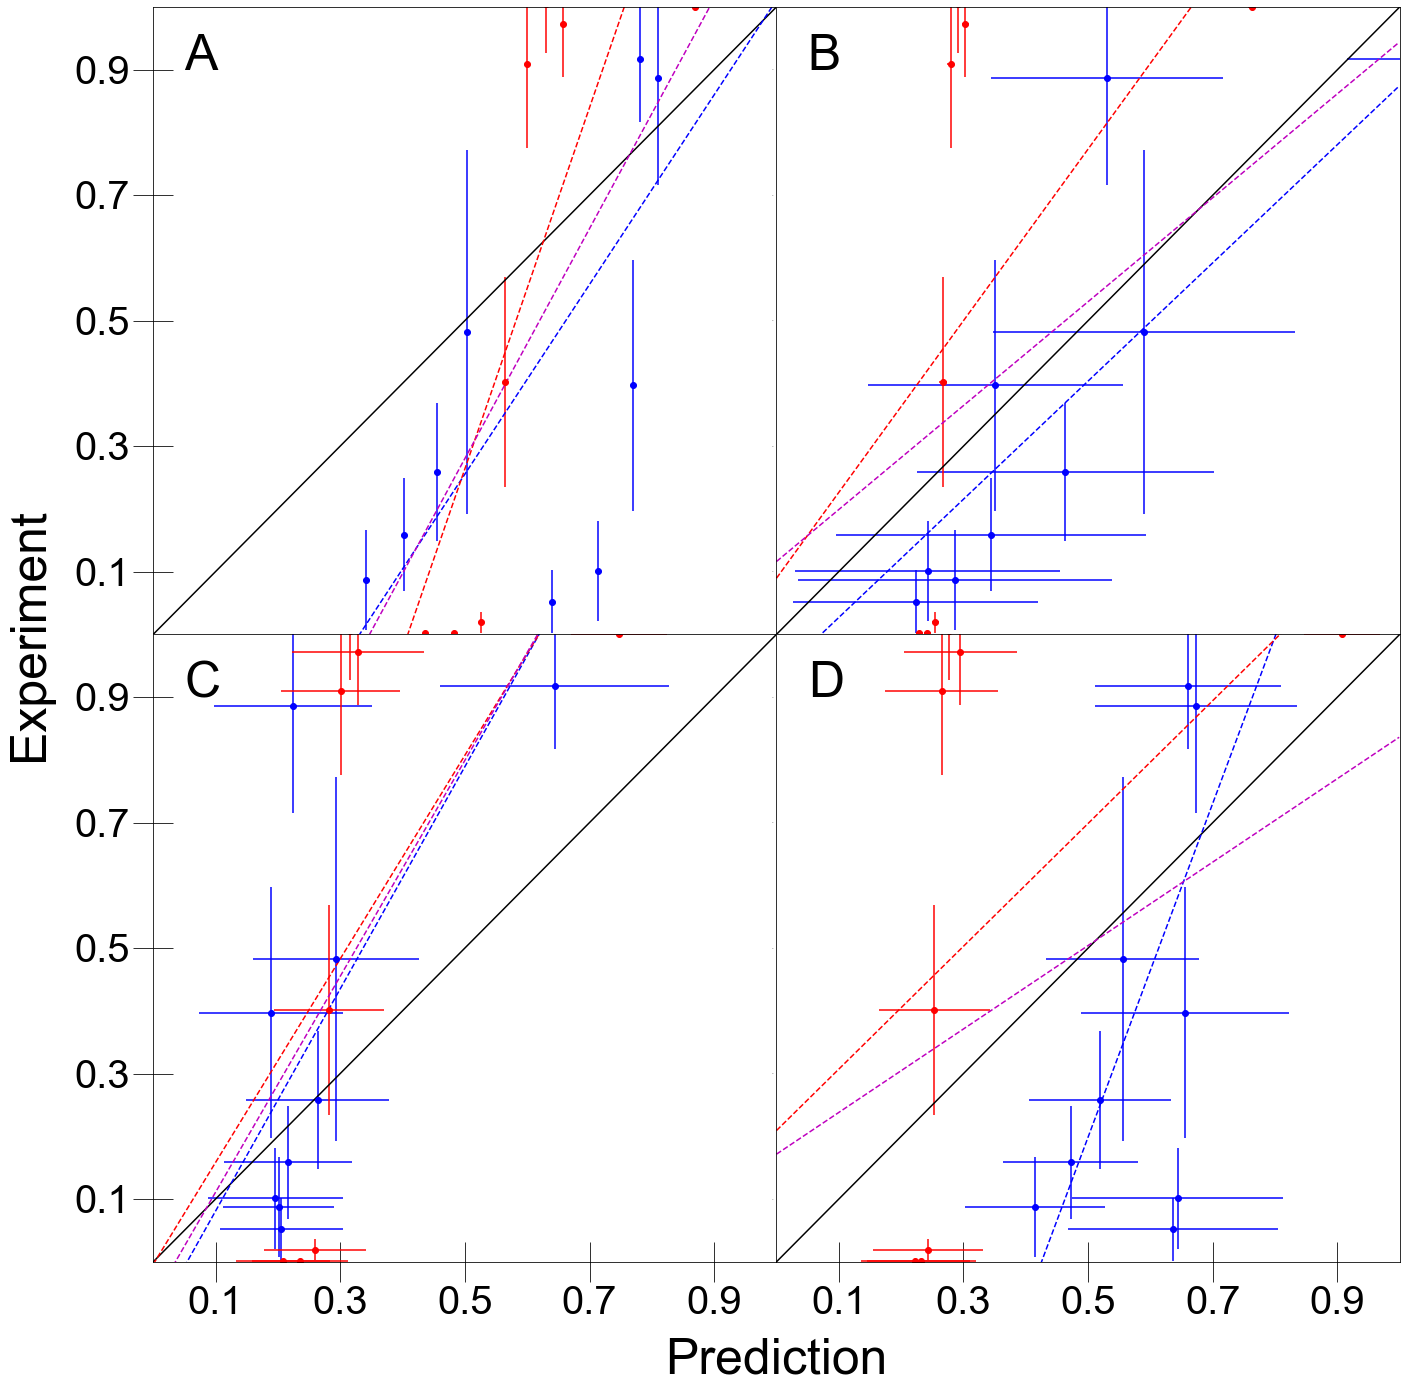

In [6]:
n = 100

fig_new_dat, axes = plt.subplots(2, 2, figsize=(18, 18), sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.ravel()
fig_new_dat.tight_layout()

fig_new_dat.add_subplot(111, frameon=False)
plt.ylabel('Experiment', fontsize=50, labelpad=100)
plt.xlabel('Prediction', fontsize=50, labelpad=75)
plt.yticks([])
plt.xticks([])

axes[0].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = out[10, 0, 0, :10]
xerr = out[10, 0, 1, :10]
axes[0].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('1, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[0].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = out[10, 0, 0, 10:]
xerr = out[10, 0, 1, 10:]
axes[0].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('1, DNP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[0].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = out[10, 0, 0, :]
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('1, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[0].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[0].tick_params(axis='y', labelsize=40, direction='inout', length=40)
axes[0].tick_params(axis='x', labelsize=0, length=0)
axes[0].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

########################

axes[1].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = out[10, 1, 0, :10]
xerr = out[10, 1, 1, :10]
axes[1].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('4, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[1].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = out[10, 1, 0, 10:]
xerr = out[10, 1, 1, 10:]
xerr = (1/n)*np.sqrt(np.sum(out[10, 1, 1, 10:]**2, axis=0))
axes[1].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('4, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[1].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = out[10, 1, 0, :]
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('4, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[1].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[1].tick_params(axis='y', labelsize=0, length=0)
axes[1].tick_params(axis='x', labelsize=0, length=0)
axes[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

########################

axes[2].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = out[10, 2, 0, :10]
xerr = out[10, 2, 1, :10]
axes[2].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('7, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[2].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = out[10, 2, 0, 10:]
xerr = out[10, 2, 1, 10:]
axes[2].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('7, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[2].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = out[10, 2, 0, :]
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('7, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[2].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[2].tick_params(axis='both', labelsize=40, direction='inout', length=40)
axes[2].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)

########################

axes[3].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = out[10, 3, 0, :10]
xerr = out[10, 3, 1, :10]
axes[3].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('10, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[3].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = out[10, 3, 0, 10:]
xerr = out[10, 3, 1, 10:]
axes[3].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('10, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[3].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = out[10, 3, 0, :]
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('10, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[3].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[3].tick_params(axis='x', labelsize=40, direction='inout', length=40)
axes[3].tick_params(axis='y', labelsize=0, length=0)
axes[3].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[3].set_xticks(np.arange(0.1, 1.0, 0.2))
axes[3].set_xlim(0, 1)
axes[3].set_ylim(0, 1)

axes[0].text(0.05, 0.9, 'A', fontsize=50, transform=axes[0].transAxes)
axes[1].text(0.05, 0.9, 'B', fontsize=50, transform=axes[1].transAxes)
axes[2].text(0.05, 0.9, 'C', fontsize=50, transform=axes[2].transAxes)
axes[3].text(0.05, 0.9, 'D', fontsize=50, transform=axes[3].transAxes)

#plt.savefig('new_data_test_single.pdf', transparent=True, format='pdf', bbox_inches='tight')

1, mLCP LinregressResult(slope=4.235604955823099, intercept=-2.2126221130190427, rvalue=0.9364578743256577, pvalue=6.602656431578447e-05, stderr=0.5609408973851234)
1, DNP LinregressResult(slope=1.4838344247857276, intercept=-0.063130224333658, rvalue=0.5851877930364328, pvalue=0.12753198416746228, stderr=0.8394226486005263)
1, All LinregressResult(slope=1.0923289381816486, intercept=-0.08773657525806666, rvalue=0.45547368010074435, pvalue=0.05750278717342665, stderr=0.5337547811297828)
4, mLCP LinregressResult(slope=2.5412720394736623, intercept=-0.9360257275193145, rvalue=0.9190917303904441, pvalue=0.00016988207646768843, stderr=0.38520474627506235)
4, mLCP LinregressResult(slope=1.2456465201815885, intercept=0.07478743624378259, rvalue=0.5409143103156031, pvalue=0.16625220680852543, stderr=0.7907275030316233)
4, All LinregressResult(slope=1.275719169043486, intercept=-0.10748705784316404, rvalue=0.5732082066065303, pvalue=0.012890417134763639, stderr=0.45591493798606536)
7, mLCP Lin

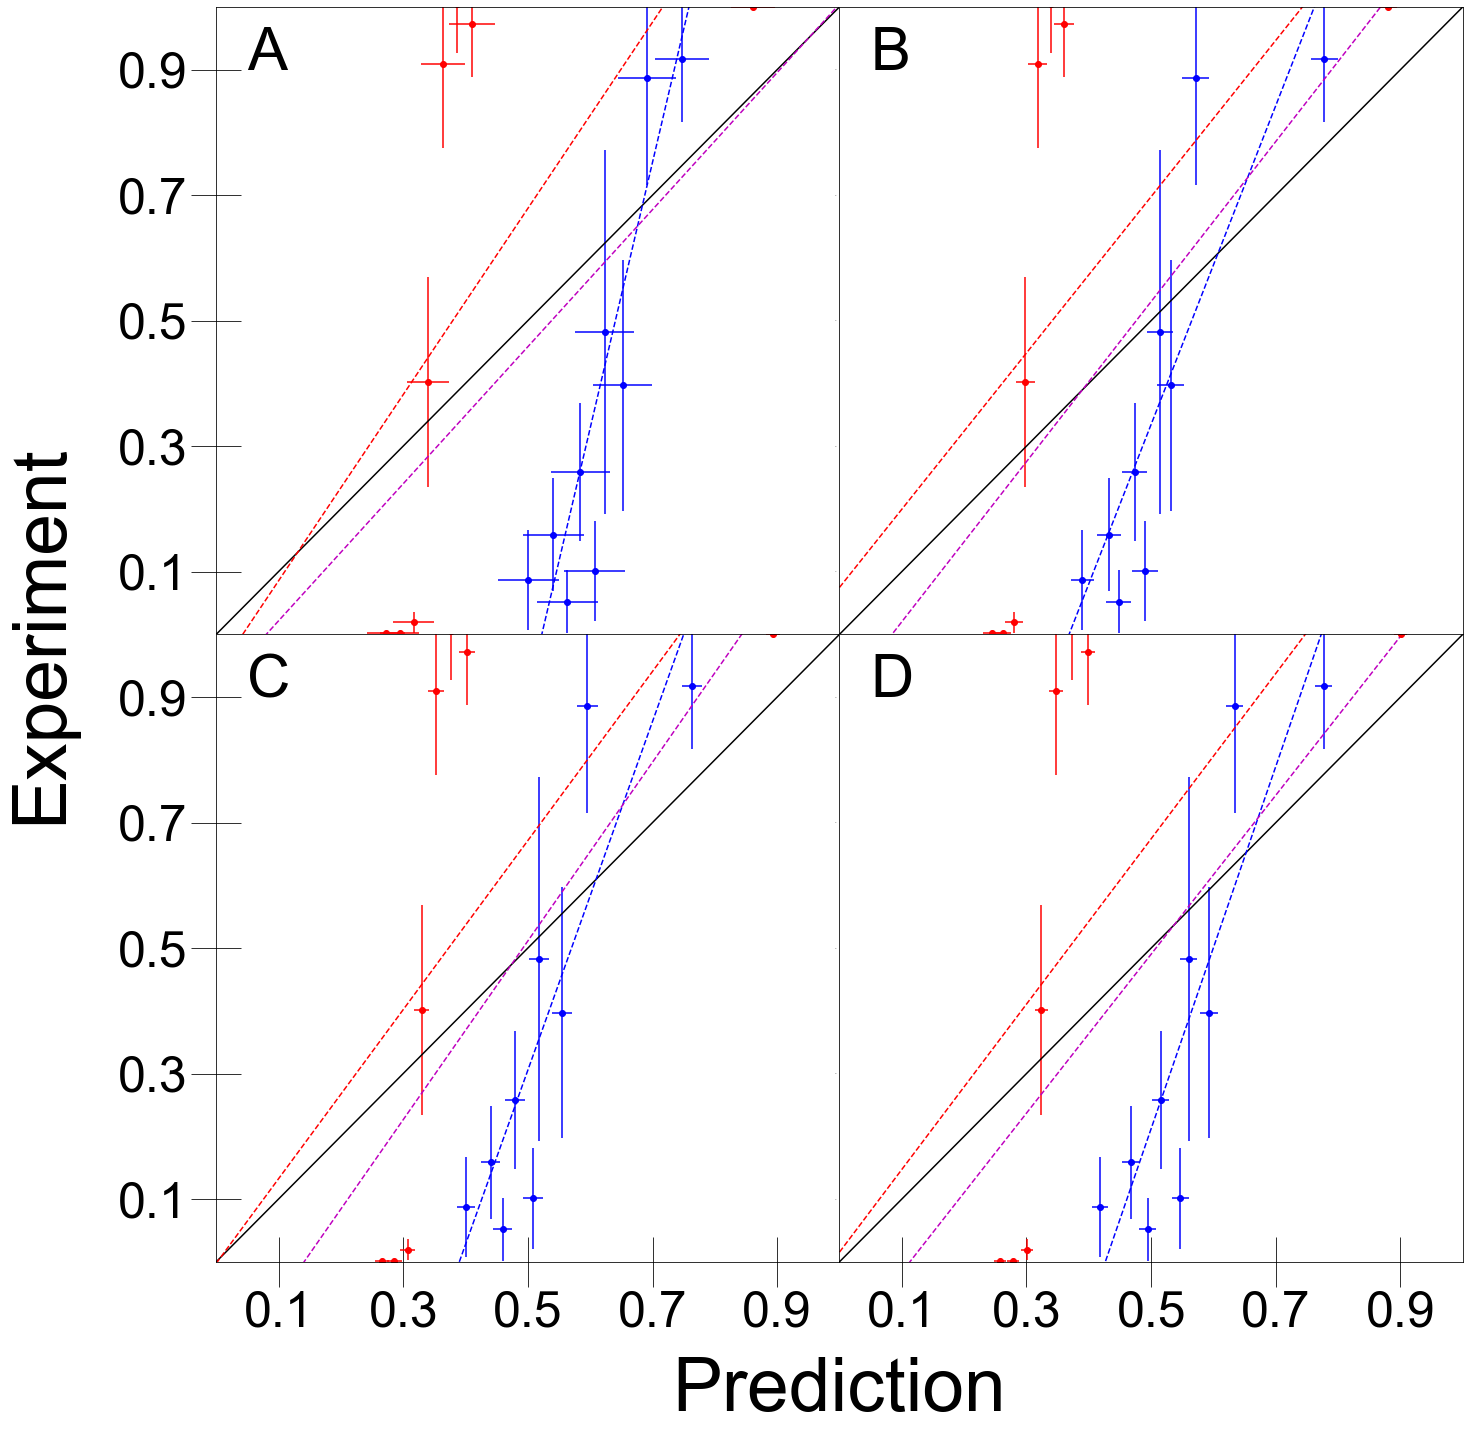

In [7]:
n = 100

fig_new_dat, axes = plt.subplots(2, 2, figsize=(18, 18), sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.ravel()
fig_new_dat.tight_layout()

fig_new_dat.add_subplot(111, frameon=False)
plt.ylabel('Experiment', fontsize=75, labelpad=140)
plt.xlabel('Prediction', fontsize=75, labelpad=95)
plt.yticks([])
plt.xticks([])

axes[0].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = np.mean(out[:n, 0, 0, :10], axis=0)
#xerr = (1/n)*np.sqrt(np.sum(out[:n, 0, 1, :10]**2, axis=0))
xerr = np.std(out[:n, 0, 0, :10], axis=0)/np.sqrt(n)
axes[0].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('1, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[0].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = np.mean(out[:n, 0, 0, 10:], axis=0)
#xerr = (1/n)*np.sqrt(np.sum(out[:n, 0, 1, 10:]**2, axis=0))
xerr = np.std(out[:n, 0, 0, 10:], axis=0)/np.sqrt(n)
axes[0].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('1, DNP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[0].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = np.mean(out[:n, 0, 0, :], axis=0)
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('1, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[0].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[0].tick_params(axis='y', labelsize=50, direction='inout', length=50)
axes[0].tick_params(axis='x', labelsize=0, length=0)
axes[0].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

########################

axes[1].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = np.mean(out[:n, 1, 0, :10], axis=0)
xerr = (1/n)*np.sqrt(np.sum(out[:n, 1, 1, :10]**2, axis=0))
axes[1].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('4, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[1].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = np.mean(out[:n, 1, 0, 10:], axis=0)
xerr = (1/n)*np.sqrt(np.sum(out[:n, 1, 1, 10:]**2, axis=0))
axes[1].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('4, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[1].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = np.mean(out[:n, 1, 0, :], axis=0)
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('4, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[1].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[1].tick_params(axis='y', labelsize=0, length=0)
axes[1].tick_params(axis='x', labelsize=0, length=0)
axes[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

########################

axes[2].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = np.mean(out[:n, 2, 0, :10], axis=0)
xerr = (1/n)*np.sqrt(np.sum(out[:n, 2, 1, :10]**2, axis=0))
axes[2].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('7, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[2].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = np.mean(out[:n, 2, 0, 10:], axis=0)
xerr = (1/n)*np.sqrt(np.sum(out[:n, 2, 1, 10:]**2, axis=0))
axes[2].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('7, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[2].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = np.mean(out[:n, 2, 0, :], axis=0)
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('7, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[2].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[2].tick_params(axis='both', labelsize=50, direction='inout', length=50)
axes[2].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)

########################

axes[3].plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), 'k')

x = np.mean(out[:n, 3, 0, :10], axis=0)
xerr = (1/n)*np.sqrt(np.sum(out[:n, 3, 1, :10]**2, axis=0))
axes[3].errorbar(x, CSN_new_A['Viability Fraction '][:10], 
             xerr=xerr, yerr=CSN_new_err[:10], fmt='bo')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10])
print('10, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][:10]))
axes[3].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'b--')

x = np.mean(out[:n, 3, 0, 10:], axis=0)
xerr = (1/n)*np.sqrt(np.sum(out[:n, 3, 1, 10:]**2, axis=0))
axes[3].errorbar(x, CSN_new_A['Viability Fraction '][10:], 
             xerr=xerr, yerr=CSN_new_err[10:], fmt='ro')
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:])
print('10, mLCP', sp.stats.linregress(x, CSN_new_A['Viability Fraction '][10:]))
axes[3].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'r--')

x = np.mean(out[:n, 3, 0, :], axis=0)
m, b, r, p, s = sp.stats.linregress(x, CSN_new_A['Viability Fraction '])
print('10, All', sp.stats.linregress(x, CSN_new_A['Viability Fraction ']))
axes[3].plot(np.arange(0, 1, 0.001), m*np.arange(0, 1, 0.001)+b, 'm--')

axes[3].tick_params(axis='x', labelsize=50, direction='inout', length=50)
axes[3].tick_params(axis='y', labelsize=0, length=0)
axes[3].set_yticks(np.arange(0.1, 1.0, 0.2))
axes[3].set_xticks(np.arange(0.1, 1.0, 0.2))
axes[3].set_xlim(0, 1)
axes[3].set_ylim(0, 1)

axes[0].text(0.05, 0.9, 'A', fontsize=60, transform=axes[0].transAxes)
axes[1].text(0.05, 0.9, 'B', fontsize=60, transform=axes[1].transAxes)
axes[2].text(0.05, 0.9, 'C', fontsize=60, transform=axes[2].transAxes)
axes[3].text(0.05, 0.9, 'D', fontsize=60, transform=axes[3].transAxes)

plt.savefig('new_data_test_all.pdf', transparent=True, format='pdf', bbox_inches='tight')

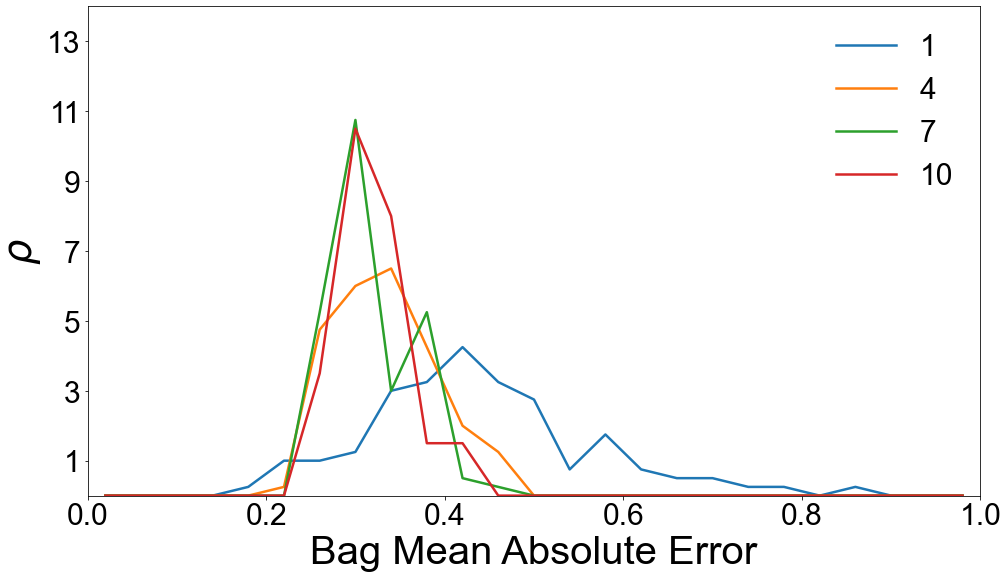

In [8]:
maes = np.array([[np.mean(np.abs(out[j, i, 0, :]-
                CSN_new_A['Viability Fraction '].values)) for j in np.arange(n)] for i in np.arange(4)])

plt.figure(figsize=(16,9))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel(r'$\rho$', fontsize=40)
plt.xlabel('Bag Mean Absolute Error', fontsize=40)

k = ['1', '4', '7', '10']
#[plt.plot(np.histogram(maes[i]), label=k[i]) for i in np.arange(4)]

for i in range(4):
    #axes[i, 0].plot(rnetsplit[i], 'bo')
    #axes[i, 0].set_ylim(0, 1.5)
       
    hist = np.histogram(maes[i], bins=25, 
                        range=(0, 1), density=True)
    
    x = hist[1][:-1]/2 + hist[1][1:]/2
    y = hist[0]

    plt.plot(x, y, label=k[i], lw=2.5)

#plt.xticks(np.arange(5))
plt.xlim(0, 1.0)
plt.yticks(np.arange(1, 15, 2))
plt.ylim(0, 14)
plt.legend(fontsize=30, framealpha=0.0)
plt.savefig('final_hist.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [9]:
[np.average(np.abs(out[:n, i, 0, :]
                   -CSN_new_A['Viability Fraction '].values)) for i in np.arange(4)]

[0.4370776123558726,
 0.3323846652498325,
 0.3173779255984647,
 0.31994717307837933]

In [10]:
[np.std(np.abs(out[:n, i, 0, :]
                   -CSN_new_A['Viability Fraction '].values))/np.sqrt(n) for i in np.arange(4)]

[0.03527879213358577,
 0.022866526631706137,
 0.02049864163652067,
 0.01995526083119158]